## Trabalho 1 - DGEMM 

### Grupo: Leandro Assis dos Santos e Gabriel Guimarães

#### Hardware de teste:

#### Informações CPU
CPU = AMD Ryzen 5 3500U\
Clock = 2.1 GHz\
Memória RAM = 6GB\
Versão gcc = 11.3

#### Informações GPU

Placa de vídeo = GTX 1050 Ti\
Memória de vídeo = 4GB\
Clock = 1290 MHz\
Versão CUDA toolkit = 12.1

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from metrics import Resultados

In [32]:
resultadosO0 = Resultados("../dgemm-code/resultadosO0.csv")
resultadosO3 = Resultados("../dgemm-code/resultadosO3.csv")
resultadosO4 = Resultados("../dgemm-code/resultadosO4.csv")
resultadosCUDA = Resultados("../dgemm-code/resultadosCUDA.csv")

## Calculando as métricas de avaliação

### Valores médios

In [33]:
# opera os resultados para calcular o FLOPS e tempo médios de cada função
resultadosCUDA.calculaFLOPS()
resultadosO0.calculaFLOPS()
resultadosO3.calculaFLOPS()
resultadosO4.calculaFLOPS()

#### O3

In [34]:
# apresenta os dataframes com os resultados médios
GFLOPS, tempo = resultadosO3.toDataFrame()

print("GFLOPS")
GFLOPS

GFLOPS


,4096X4096,5120X5120,6144X6144,7168X7168,8192X8192
Normal,0.13 ± 0.00,0.14 ± 0.00,0.13 ± 0.00,0.13 ± 0.00,0.11 ± 0.00
AVX,0.36 ± 0.00,0.39 ± 0.00,0.38 ± 0.00,0.38 ± 0.00,0.36 ± 0.00
Unroll,0.52 ± 0.01,0.54 ± 0.00,0.54 ± 0.01,0.53 ± 0.00,0.51 ± 0.01
Block,3.17 ± 0.00,3.13 ± 0.09,3.01 ± 0.21,3.02 ± 0.00,2.92 ± 0.04


In [35]:
print("Tempo em segundos")
tempo

Tempo em segundos


,4096X4096,5120X5120,6144X6144,7168X7168,8192X8192
Normal,520.94 ± 2.88,984.99 ± 0.23,1771.18 ± 0.38,2909.86 ± 14.06,4892.35 ± 35.10
AVX,188.54 ± 0.78,346.94 ± 0.28,604.75 ± 1.21,977.00 ± 0.63,1512.28 ± 0.76
Unroll,131.50 ± 1.58,246.72 ± 0.73,428.57 ± 8.17,691.19 ± 4.55,1073.60 ± 12.10
Block,21.67 ± 0.03,42.88 ± 1.22,77.00 ± 5.36,121.85 ± 0.02,188.23 ± 2.58


#### O4

In [36]:
# apresenta os dataframes com os resultados médios
GFLOPS, tempo = resultadosO4.toDataFrame()

print("GFLOPS")
GFLOPS

GFLOPS


,4096X4096,5120X5120,6144X6144,7168X7168,8192X8192
Normal,0.13 ± 0.00,0.13 ± 0.00,0.12 ± 0.00,0.13 ± 0.00,0.11 ± 0.00
AVX,0.36 ± 0.00,0.36 ± 0.02,0.38 ± 0.00,0.38 ± 0.00,0.37 ± 0.00
Unroll,0.53 ± 0.00,0.56 ± 0.00,0.54 ± 0.01,0.53 ± 0.00,0.53 ± 0.01
Block,1.94 ± 0.07,1.85 ± 0.47,2.06 ± 0.12,2.01 ± 0.09,2.65 ± 0.11


In [37]:
print("Tempo em segundos")
tempo

Tempo em segundos


,4096X4096,5120X5120,6144X6144,7168X7168,8192X8192
Normal,544.56 ± 1.13,1025.70 ± 4.78,1884.24 ± 26.50,2891.44 ± 3.88,4942.08 ± 22.74
AVX,192.54 ± 0.28,368.17 ± 21.02,606.05 ± 2.47,970.29 ± 2.99,1492.58 ± 3.24
Unroll,129.43 ± 1.00,241.09 ± 1.00,433.20 ± 5.52,695.74 ± 4.80,1038.57 ± 10.13
Block,35.35 ± 1.36,72.66 ± 18.43,112.81 ± 6.51,183.15 ± 8.49,207.44 ± 8.58


#### O0

In [38]:
# apresenta os dataframes com os resultados médios
GFLOPS, tempo = resultadosO0.toDataFrame()

print("GFLOPS")
GFLOPS

GFLOPS


,4096X4096,5120X5120,6144X6144,7168X7168,8192X8192
Normal,0.04 ± 0.00,0.04 ± 0.00,0.04 ± 0.00,0.04 ± 0.00,0.04 ± 0.00
AVX,0.09 ± 0.00,0.09 ± 0.00,0.09 ± 0.00,0.09 ± 0.00,0.09 ± 0.00
Unroll,0.11 ± 0.00,0.11 ± 0.00,0.11 ± 0.00,0.11 ± 0.00,0.11 ± 0.00
Block,0.32 ± 0.00,0.30 ± 0.01,0.30 ± 0.01,0.32 ± 0.01,0.33 ± 0.00


In [39]:
print("Tempo em segundos")
tempo

Tempo em segundos


,4096X4096,5120X5120,6144X6144,7168X7168,8192X8192
Normal,1813.65 ± 5.34,3511.00 ± 5.96,5626.90 ± 10.40,9018.99 ± 39.98,14677.76 ± 14.89
AVX,782.59 ± 1.50,1516.13 ± 3.96,2538.44 ± 1.37,4027.03 ± 12.82,6145.49 ± 0.95
Unroll,608.21 ± 0.27,1181.22 ± 0.97,2055.68 ± 1.68,3271.62 ± 3.61,4883.05 ± 1.07
Block,215.51 ± 0.77,442.63 ± 7.69,772.99 ± 23.10,1163.41 ± 24.69,1687.27 ± 8.42


### Gráficos

In [40]:
# plota os gráficos de barras (uma barra por função + barra pro CUDA)
# um gráfico por flag de otimização

barWidth = 0.15

pos_barra = [[0, 1, 2, 3, 4]]

for _ in range(4):
    pos_barra.append([x + barWidth for x in pos_barra[-1]])

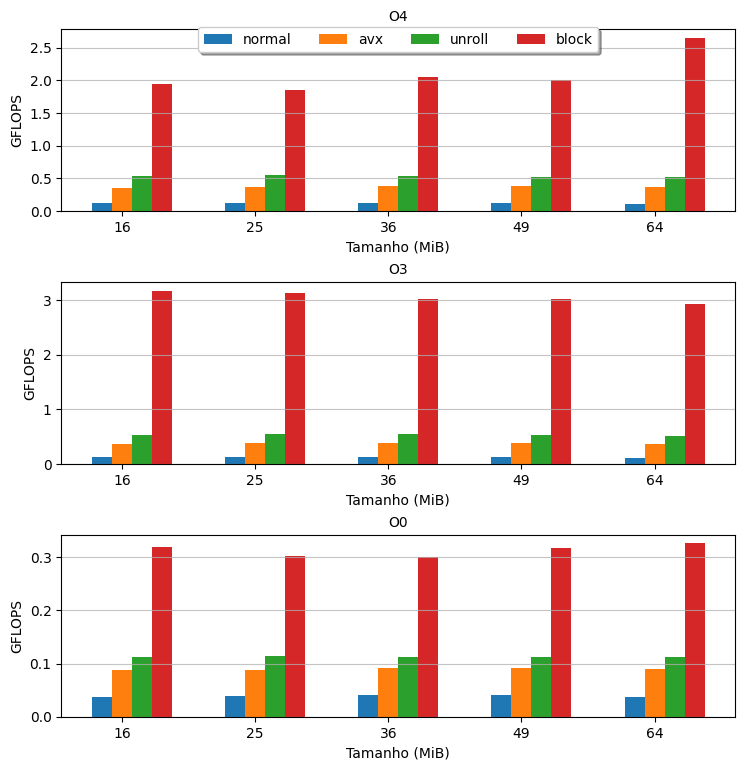

In [41]:
fig, ax = plt.subplots(3, 1, figsize=(8, 8))
fig.tight_layout(pad=3.0)
plt.setp(ax, xticks=[r + barWidth for r in range(5)], xticklabels=['16', '25', '36', '49', '64'])
plt.setp(ax, ylabel='GFLOPS', xlabel='Tamanho (MiB)')

# O4
for idx, funcao in enumerate(["normal", "avx", "unroll", "block"]):
    mediaFlops, stdFlops = resultadosO4.getFLOPSValues(funcao)
    
    ax[0].bar(pos_barra[idx], mediaFlops, width = barWidth, label = funcao)
    ax[0].grid(axis='y', alpha=0.75)
    ax[0].set_title("O4", fontsize=10)
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), shadow=True, ncol=5)

# O3
for idx, funcao in enumerate(["normal", "avx", "unroll", "block"]):
    mediaFlops, stdFlops = resultadosO3.getFLOPSValues(funcao)

    ax[1].bar(pos_barra[idx], mediaFlops, width = barWidth, label = funcao)
    ax[1].grid(axis='y', alpha=0.75)
    ax[1].set_title("O3", fontsize=10)

# O0
for idx, funcao in enumerate(["normal", "avx", "unroll", "block"]):
    mediaFlops, stdFlops = resultadosO0.getFLOPSValues(funcao)

    ax[2].bar(pos_barra[idx], mediaFlops, width = barWidth, label = funcao)
    ax[2].grid(axis='y', alpha=0.75)
    ax[2].set_title("O0", fontsize=10)


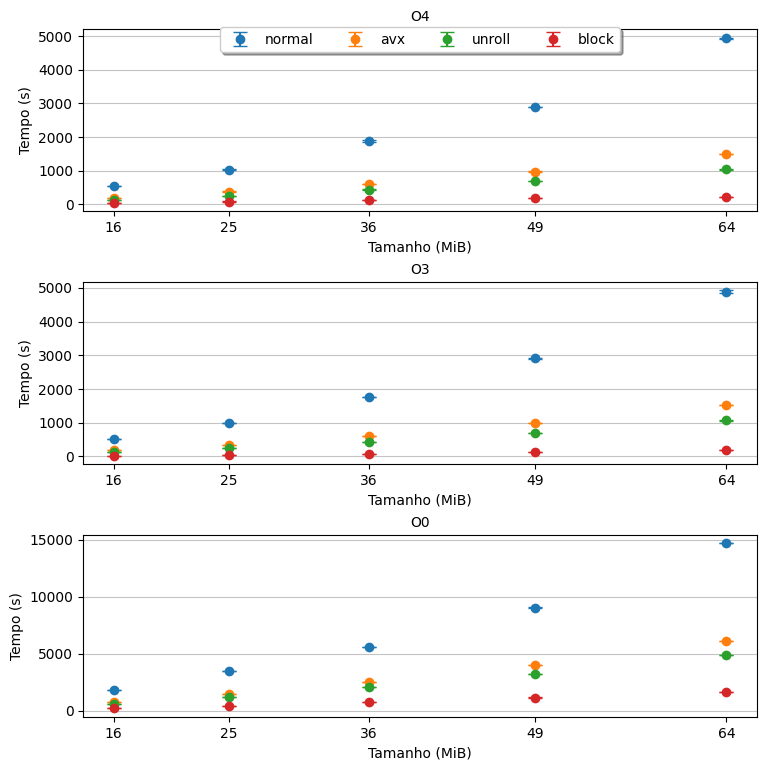

In [52]:
# plotar as curvas de tempo por tamanho para cada função + cuda
# um gráfico por flag de otimização

# objetivo: ver qual curva tem menor derivada, logo será melhor para matrizes grandes

fig, ax = plt.subplots(3, 1, figsize=(8, 8))
fig.tight_layout(pad=3.0)
plt.setp(ax, ylabel='Tempo (s)', xlabel='Tamanho (MiB)')
plt.setp(ax, xticks=[16, 25, 36, 49, 64], xticklabels=['16', '25', '36', '49', '64'])
x = [16, 25, 36, 49, 64]

# O4
for idx, funcao in enumerate(["normal", "avx", "unroll", "block"]):
    mediaFlops, stdFlops = resultadosO4.getTempoValues(funcao)
    
    ax[0].errorbar(x, mediaFlops, yerr=stdFlops, label = funcao, fmt='o', capsize=5)
    ax[0].grid(axis='y', alpha=0.75)
    ax[0].set_title("O4", fontsize=10)
    ax[0].legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), shadow=True, ncol=5)

# O3
for idx, funcao in enumerate(["normal", "avx", "unroll", "block"]):
    mediaFlops, stdFlops = resultadosO3.getTempoValues(funcao)

    ax[1].errorbar(x, mediaFlops, yerr=stdFlops, label = funcao, fmt='o', capsize=5)
    ax[1].grid(axis='y', alpha=0.75)
    ax[1].set_title("O3", fontsize=10)

# O0
for idx, funcao in enumerate(["normal", "avx", "unroll", "block"]):
    mediaFlops, stdFlops = resultadosO0.getTempoValues(funcao)

    ax[2].errorbar(x, mediaFlops, yerr=stdFlops, label = funcao, fmt='o', capsize=5)
    ax[2].grid(axis='y', alpha=0.75)
    ax[2].set_title("O0", fontsize=10)

## Extras:

### Número de instruções


Utilizando o site [Compiler Explorer](https://www.godbolt.org) para gerar o código assembly de cada uma das funções DGEMM do arquivo DGEMM.c, foi possível contar o número de instruções de cada uma das funções. Para isso, foram utilizados a versão 11.3 do gcc x86 e as flags `-mavx -lrt -Wall`, além da respectiva flag de otimização. Em seguida, foi contado o número de instruções de cada uma das funções. O resultado pode ser visto na tabela abaixo.



|Flag do compilador|Normal|Instru AVX| AVX+UNROLL|AVX+BLOCK|
|------------------|--------------------|------------------|--------------------|--------------------|
|-O0|70|90|128|203|
|-O3|44|51|63|147|
|-Ofast|81|51|63|147|

### CUDA

In [43]:
GFLOPS, tempo = resultadosCUDA.toDataFrame()

print("GFLOPS")
GFLOPS

GFLOPS


,4096X4096,5120X5120,6144X6144,7168X7168,8192X8192
CUDA,13.64 ± 0.29,13.44 ± 0.05,13.51 ± 0.06,13.16 ± 0.04,13.18 ± 0.02


In [44]:
print("Tempo em segundos")
tempo

Tempo em segundos


,4096X4096,5120X5120,6144X6144,7168X7168,8192X8192
CUDA,5.04 ± 0.11,9.99 ± 0.04,17.16 ± 0.07,27.99 ± 0.08,41.71 ± 0.07


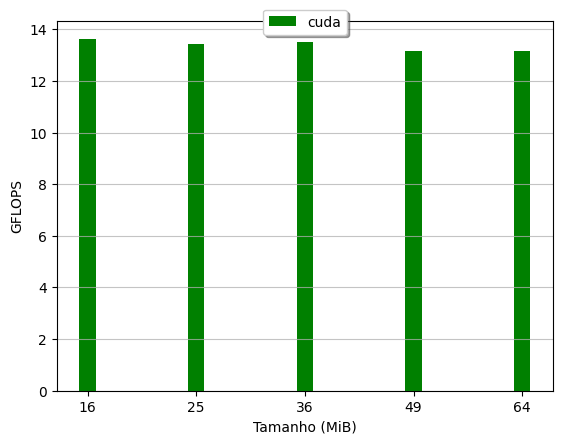

In [54]:
for idx, funcao in enumerate(["normal"]):
    mediaFlops, stdFlops = resultadosCUDA.getFLOPSValues(funcao)

    plt.bar(pos_barra[0], mediaFlops, width = barWidth, label = "cuda", color='green')
    plt.grid(axis='y', alpha=0.75)
    plt.xticks(pos_barra[0], ['16', '25', '36', '49', '64'])

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), shadow=True)
    plt.xlabel('Tamanho (MiB)')
    plt.ylabel('GFLOPS')